# Preprocessing Data
1. Check for Missing Values
2. Check Data Types
3. Validate Data Ranges
4. Remove Duplicates
5. Check for Outliers
6. Data Standardisation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Read Data from csv

In [12]:
df = pd.read_csv('gait.csv')
df.head()

,subject,condition,replication,leg,joint,time,angle
0,1,1,1,1,1,0,4.682881
1,1,1,1,1,1,1,5.073127
2,1,1,1,1,1,2,5.229774
3,1,1,1,1,1,3,5.083273
4,1,1,1,1,1,4,4.652399


## Check for Missing Values
- There is no missing values in the dataset

In [13]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
missing_percentages = (missing_counts / len(df)) * 100
missing_percentages

subject        0.0
condition      0.0
replication    0.0
leg            0.0
joint          0.0
time           0.0
angle          0.0
dtype: float64

## Check Data Types
- Data types are now incorrect:
  - `subject`: int64
  - `condition`: int64
  - `replication`: int64
  - `leg`: int64
  - `joint`: int64
  - `time`: int64
  - `angle`: float64 → only correct type
- Data types should be converted to its correct types:
  - `subject`: categorical factor
  - `condition`: categorical factor
  - `replication`: categorical factor
  - `leg`: categorical factor
  - `joint`: categorical factor
  - `time`: ordinal categorical factor
  - `angle`: float64

In [14]:
print(f"Data types before:\n{df.dtypes}\n")
categorical_columns = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']
df[categorical_columns] = df[categorical_columns].astype('category')
df['time'] = df['time'].cat.set_categories(list(range(1, 101)), ordered=True)
print(f"Data types after:\n{df.dtypes}")

Data types before:
subject          int64
condition        int64
replication      int64
leg              int64
joint            int64
time             int64
angle          float64
dtype: object

Data types after:
subject        category
condition      category
replication    category
leg            category
joint          category
time           category
angle           float64
dtype: object


## Validate Data Ranges
According to data description, the data ranges should be:
- `subject`: 1 - 10
- `condition`: 1 - 3
- `replication`: 1 - 10
- `leg`: 1 - 2
- `joint`: 1 - 3
- `time`: 0 - 100
- `angle`: -90 - 90

⇒ The dataset is valid

In [15]:
for col in df:
    print(f'{col}: {min(df[col])} - {max(df[col])}')


subject: 1 - 10
condition: 1 - 3
replication: 1 - 10
leg: 1 - 2
joint: 1 - 3
time: nan - nan
angle: -27.0046344609315 - 78.3093422869548


## Remove Duplicates
- There is no duplicates in the dataset

In [16]:
# Check duplicates
print(df[df.duplicated()])

Empty DataFrame
Columns: [subject, condition, replication, leg, joint, time, angle]
Index: []


## Check for Outliers
- As all categorical columns are valid, we only need to check for outliers in `angle` column
- There are many outliers in `angle` column, but they are valid as the data description says that the range of `angle` is -90 to 90, and they are preprocessed and verified before publishing

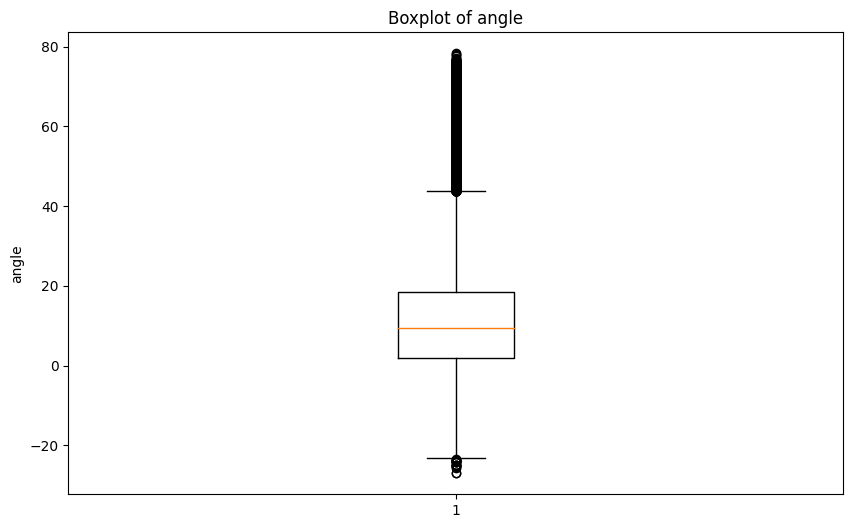

In [17]:
# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['angle'])
plt.title('Boxplot of angle')
plt.ylabel('angle')
plt.show()

In [18]:
df1 = df[['angle']].copy()
df1['z_score'] = (df['angle'] - df['angle'].mean()) / df['angle'].std()
print(df1)

Q1 = df1['angle'].quantile(0.25)
Q3 = df1['angle'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print(f"Lower fence: {lower_fence}")
print(f"Upper fence: {upper_fence}")
outliers = df1[(df1['angle'] < lower_fence) | (df1['angle'] > upper_fence)]

if outliers.empty:
    print("No outliers detected.")
else:
    print(f'\nOutliers:\n{outliers}')

            angle   z_score
0        4.682881 -0.465901
1        5.073127 -0.441549
2        5.229774 -0.431775
3        5.083273 -0.440916
4        4.652399 -0.467803
...           ...       ...
181795  29.778412  1.100043
181796  29.247559  1.066918
181797  28.796951  1.038800
181798  28.432936  1.016086
181799  28.136438  0.997585

[181800 rows x 2 columns]
Lower fence: -23.353693380143657
Upper fence: 43.708039649853035

Outliers:
            angle   z_score
171     46.941278  2.170993
172     50.241579  2.376930
173     53.286476  2.566929
174     55.996580  2.736038
175     58.287905  2.879015
...           ...       ...
181676  49.160691  2.309483
181677  48.212572  2.250321
181678  46.986275  2.173801
181679  45.490476  2.080464
181680  43.727589  1.970462

[10762 rows x 2 columns]


## Data Standardisation
- Depends on the model we use, we may need to standardise the data
- Only column `angle` needs to be standardised
- The formula for standardisation is: `z = (x - mean) / std`

In [19]:
scaler = StandardScaler()
df['angle_scaled'] = scaler.fit_transform(df['angle'].values.reshape(-1, 1))
df.sample(5)

,subject,condition,replication,leg,joint,time,angle,angle_scaled
37642,3,1,3,1,1,70,-23.246272,-2.208666
80332,5,2,3,2,1,37,18.193763,0.377170
151626,9,2,1,1,2,25,13.513417,0.085119
177388,10,3,3,2,2,32,0.083548,-0.752898
78740,5,1,10,2,3,61,-8.635683,-1.296973


In [20]:
# export data to gait.csv
df.to_csv('gait_standardised.csv', index=False)
df.sample(5)

,subject,condition,replication,leg,joint,time,angle,angle_scaled
18408,2,1,1,1,3,26,0.478903,-0.728228
148940,9,1,6,2,2,66,52.026691,2.488326
76222,5,1,6,2,2,68,51.618480,2.462854
123270,7,3,4,1,3,50,-10.230929,-1.396516
178333,10,3,5,1,2,68,44.329834,2.008047
